# Computer Vision
# Jacobs University Bremen
# Fall 2022
# Homework 6

Use machine learning techniques to identify specific geomorphological features on the Archytas Dome on the Moon.

In [54]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from PIL import Image
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
import argparse
import os
import seaborn as sns
from matplotlib.colors import ListedColormap


from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


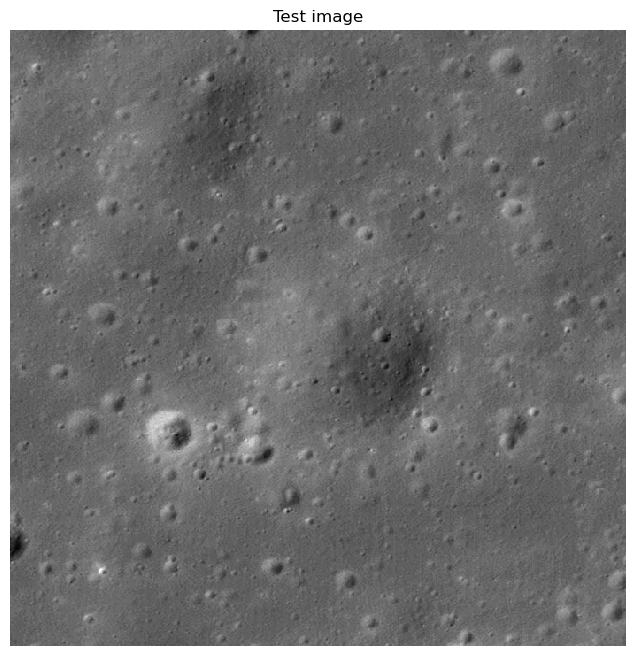

In [55]:
img = io.imread('Moon.jpg', as_gray=True)

# Show image
plt.imshow(img)
plt.axis('off')
plt.title("Test image")
plt.show()

## Part 1: K-nearest neighbor
### 1.1 Distance measure - Euclidean

Graphical representation of the distance measurement between data points in order to create different classes that help object recognition.

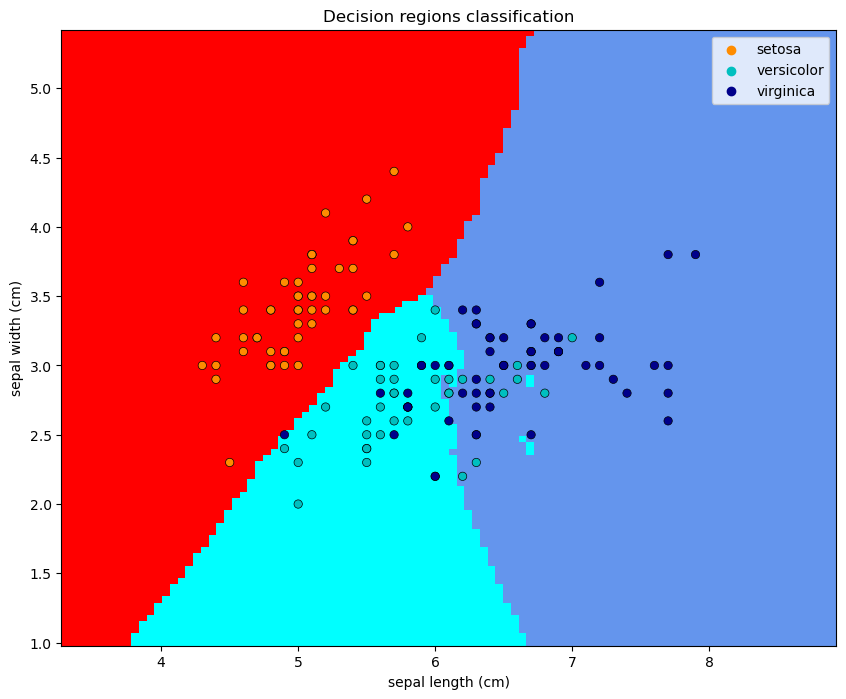

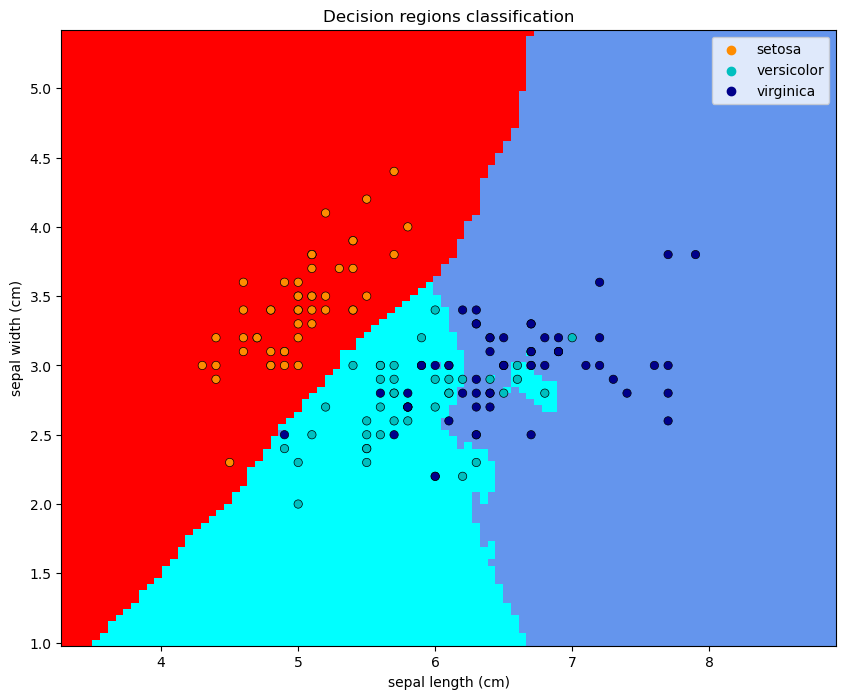

In [67]:
n_neighbors = 17

iris = datasets.load_iris()

### we only take the first two features. 
X = iris.data[:, :2]
y = iris.target

### Create color maps
cmap_light = ListedColormap(["red", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    ### Creating an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cmap_light, ax=ax, 
        response_method="predict", 
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    ### Ploting the data
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], 
    palette=cmap_bold, alpha=1.0, 
    edgecolor="black")
    plt.title("Decision regions classification")
